# Обработка естественного языка NLP

### Разбиение текста на предложения и слова

In [3]:
from textblob import TextBlob

In [4]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'
blob = TextBlob(text)    

In [5]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [6]:
#разделяем текст на предложения
blob.sentences

[Sentence("Today is a beautiful day."),
 Sentence("Tomorrow looks like bad weather.")]

In [7]:
#разделяем текст на слова
blob.words

WordList(['Today', 'is', 'a', 'beautiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather'])

### Пометка частей речи

In [8]:
# свойство возвращает список кортежей, где 1 элемент это слов, 
#а второй это сокращенное название части речи
blob.tags

[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

### Извлечение именных конструкций

In [9]:
#Свойство noun_phrases класса TextBlob возвращает объект WordList со спи-
#ском объектов Word
blob.noun_phrases

WordList(['beautiful day', 'tomorrow', 'bad weather'])

### Анализ эмоциональной окраски с использованием анализатора TextBlob по умолчанию

In [10]:
blob.sentiment

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

In [11]:
%precision 3

'%.3f'

In [12]:
blob.sentiment.polarity

0.075

In [13]:
blob.sentiment.subjectivity

0.833

In [14]:
# получаем эмоциональную окраску предложений в отдельности
for sentences in blob.sentences:
    print(sentences.sentiment)

Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


In [15]:
# Анализ эмоциональной окраски 
# с использованием NaiveBayesAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())

In [16]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [17]:
blob.sentiment

Sentiment(classification='neg', p_pos=0.47662917962091056, p_neg=0.5233708203790892)

In [18]:
# получаем эмоциональную окраску предложений в отдельности
for sentences in blob.sentences:
    print(sentences.sentiment)

Sentiment(classification='pos', p_pos=0.8117563121751951, p_neg=0.18824368782480477)
Sentiment(classification='neg', p_pos=0.174363226578349, p_neg=0.8256367734216521)


###  Распознавание языка и перевод

In [19]:
# метод для распознования языка текста
blob.detect_language()

'en'

In [20]:
russian = blob.translate(to='ru')

In [21]:
russian

TextBlob("Сегодня прекрасный день. Завтра похоже ненастье.")

In [22]:
russian.detect_language()

'ru'

In [23]:
russian.translate()

TextBlob("Today is a wonderful day. Tomorrow looks like bad weather.")

###  Формообразование: образование единственного и множественного числа

In [24]:
from textblob import Word

In [25]:
index = Word('Index')
index.pluralize()

'Indexes'

In [26]:
food = Word('Food')
food.pluralize()

'Foods'

In [27]:
animals = TextBlob('dog cat fish cow duck dick').words

In [28]:
animals

WordList(['dog', 'cat', 'fish', 'cow', 'duck', 'dick'])

In [29]:
animals.pluralize()

WordList(['dogs', 'cats', 'fish', 'kine', 'ducks', 'dicks'])

###  Проверка орфографии и исправление ошибок

In [30]:
word = Word('theyr')
word.spellcheck()

[('they', 0.571), ('their', 0.429)]

In [31]:
word.correct()

'they'

In [32]:
sentence = TextBlob('Ths sentense has missplled wrds.')
sentence.correct()

TextBlob("The sentence has misspelled words.")

###  Нормализация: выделение основы и лемматизация

In [33]:
# это выделение основы, корня слова
word = Word('varieties')
word.stem()

'varieti'

In [34]:
# это лемантизация, то есть реально слово
word.lemmatize()

'variety'

### Частоты слов

In [35]:
from pathlib import Path
path = Path('RameoAndJuliet.txt')

In [36]:
blob = TextBlob(path.read_text())

In [37]:
blob.word_counts['juliet']

192

In [38]:
words = blob.words

In [39]:
words.count('joy')

14

### Получение определений, синонимов и антонимов из WordNet


In [40]:
happy = Word('happy')

In [41]:
# получение определений
happy.definitions

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

In [42]:
# получение синонимов
happy.synsets

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [43]:
bad = Word('bad')
synonyms = set()
for synonym in bad.synsets:
    for lemma in synonym.lemmas():
        synonyms.add(lemma.name())

In [44]:
synonyms

{'bad',
 'badly',
 'badness',
 'big',
 'defective',
 'forged',
 'high-risk',
 'regretful',
 'risky',
 'sorry',
 'speculative',
 'spoiled',
 'spoilt',
 'tough',
 'uncollectible',
 'unfit',
 'unsound'}

In [45]:
# получение антонимов
lem = bad.synsets[0].lemmas()

In [46]:
lem[0].antonyms()

[Lemma('good.n.03.good')]

### Удаление игнорируемых слов

In [49]:
# загружаем стоп слова
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/freshman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [52]:
len(stop)

179

In [55]:
blob = TextBlob('Today is a beautifull day')
blob

TextBlob("Today is a beautifull day")

In [56]:
new_blob = [word for word in blob.words if word not in stop]

In [57]:
new_blob

['Today', 'beautifull', 'day']

## Визуализация частот вхождения слов с использованием гистограмм и словарных облаков

### Визуализация частот вхождения слов средствами Pandas

In [60]:
blob = TextBlob(Path('RameoAndJuliet.txt').read_text())

In [61]:
items = blob.word_counts.items()

In [67]:
items = [item for item in items if item[0] not in stop]

In [69]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True )

In [71]:
del(sorted_items[0])

In [74]:
top20 = sorted_items[0:20]

In [83]:
import pandas as pd 
df = pd.DataFrame(top20, columns=['word', 'frequency'])

In [84]:
df.head()

,word,frequency
0,romeo,317
1,thou,278
2,juliet,192
3,thy,170
4,capulet,163


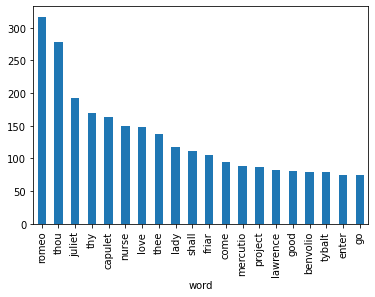

In [86]:
df.plot.bar(x='word', y='frequency', legend= False)